![Static Badge](https://img.shields.io/badge/GitHub-janduplessis883-%23aabd3b)  ![Static Badge](https://img.shields.io/badge/Python-3.10.6-%23ae4f4d) ![Static Badge](https://img.shields.io/badge/Telegram-%40jdp145-%2354a7e5?logo=telegram)

In [91]:
import pandas as pd 
from transformers import pipeline

from sheethelper import SheetHelper
import seaborn as sns
import matplotlib.pyplot as plt

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
sh = SheetHelper(sheet_url='https://docs.google.com/spreadsheets/d/1K2d32XmZQMdGLslNzv2ZZoUquARl6yiKRT5SjUkTtIY/edit#gid=1323317089', sheet_id=0)
data = sh.gsheet_to_df()
data.head(2)

,Timestamp,How likely are you to recommend our service to friends and family if they needed similar care or treatment?,Please tell us why you feel this way?,Is there anything that would have made your experience better?
0,13/07/2023 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up
1,13/07/2023 15:29:16,Extremely likely,so good so confidential,


In [93]:
data.columns = ['time', 'rating', 'free_text', 'do_better']
data['time'] = pd.to_datetime(data['time'], format="%d/%m/%Y %H:%M:%S")
data.head(2)

,time,rating,free_text,do_better
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,


In [94]:
data['full_text'] = data['free_text'].astype('str') + ' ' + data['do_better'].astype('str')
data['full_text'] = data['full_text'].str.replace('\s+', ' ', regex=True).str.strip()

# Text Classification

In [95]:
# Initialize classifier
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

# Initialize lists to store labels and scores
labels1 = []
scores1 = []
labels2 = []
scores2 = []

# Iterate over DataFrame rows and classify text
for index, row in data.iterrows():
    print(f'. ', end="")
    sentence = row['full_text']
    model_outputs = classifier(sentence)
    labels1.append(model_outputs[0][0]['label'])
    scores1.append(model_outputs[0][0]['score'])
    labels2.append(model_outputs[0][1]['label'])
    scores2.append(model_outputs[0][1]['score'])
    
# Add labels and scores as new columns
data['label1'] = labels1
data['score1'] = scores1
data['label2'] = labels2
data['score2'] = scores2

print("✅")

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ✅


In [96]:
data.head()

,time,rating,free_text,do_better,full_text,label1,score1,label2,score2
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up,"Very friendly caring staff, treated me with re...",admiration,0.795817,approval,0.221384
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,,so good so confidential,admiration,0.910946,approval,0.073821
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.,The doctor was very understanding and very kno...,admiration,0.915100,approval,0.161223
3,2023-07-13 15:30:10,Extremely likely,Dr Emiliani was extremely nice,the receptionist was very unkind,Dr Emiliani was extremely nice the receptionis...,admiration,0.864688,neutral,0.078259
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.,I was spoken to politely on the phone and a te...,joy,0.447508,relief,0.138327


# Sentiment Analysis

In [97]:
sentiment_task = pipeline("sentiment-analysis", model='cardiffnlp/twitter-roberta-base-sentiment-latest')

# Initialize lists to store labels and scores
labels3 = []
scores3 = []

# Iterate over DataFrame rows and classify text
for index, row in data.iterrows():
    print(f'. ', end="")
    sentence = row['full_text']
    model_outputs = sentiment_task(sentence)
    labels3.append(model_outputs[0]['label'])
    scores3.append(model_outputs[0]['score'])

    
# Add labels and scores as new columns
data['label3'] = labels3
data['score3'] = scores3

print("✅")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ✅


In [98]:
data.head()

,time,rating,free_text,do_better,full_text,label1,score1,label2,score2,label3,score3
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up,"Very friendly caring staff, treated me with re...",admiration,0.795817,approval,0.221384,positive,0.956834
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,,so good so confidential,admiration,0.910946,approval,0.073821,positive,0.925523
2,2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.,The doctor was very understanding and very kno...,admiration,0.915100,approval,0.161223,positive,0.974944
3,2023-07-13 15:30:10,Extremely likely,Dr Emiliani was extremely nice,the receptionist was very unkind,Dr Emiliani was extremely nice the receptionis...,admiration,0.864688,neutral,0.078259,positive,0.910926
4,2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.,I was spoken to politely on the phone and a te...,joy,0.447508,relief,0.138327,positive,0.652162


In [99]:
sentiment = data['score3'].value_counts(normalize=True)
sentiment

0.401299    0.182482
0.940536    0.004866
0.760212    0.004866
0.977028    0.004866
0.698705    0.004866
              ...   
0.553457    0.002433
0.875025    0.002433
0.971585    0.002433
0.849331    0.002433
0.719318    0.002433
Name: score3, Length: 329, dtype: float64

Text(0.5, 1.0, 'Sentiment Analysis of FF Test Responses')

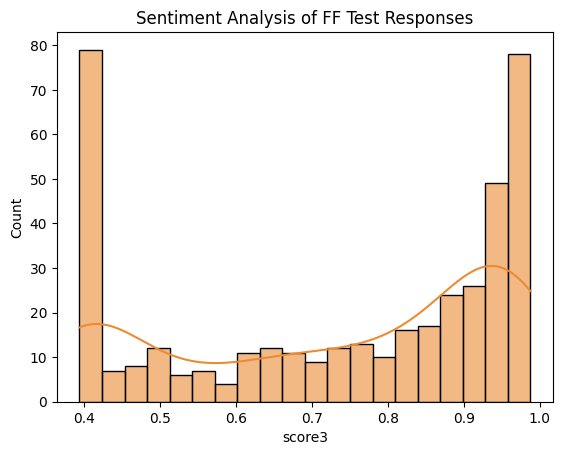

In [149]:
sentiment_score = data['score3']


sns.histplot(sentiment_score, color='#ec8b33', bins=20, kde=True, alpha=0.6)
plt.title("Sentiment Analysis of FF Test Responses")

# Rating Mapping

<Axes: >

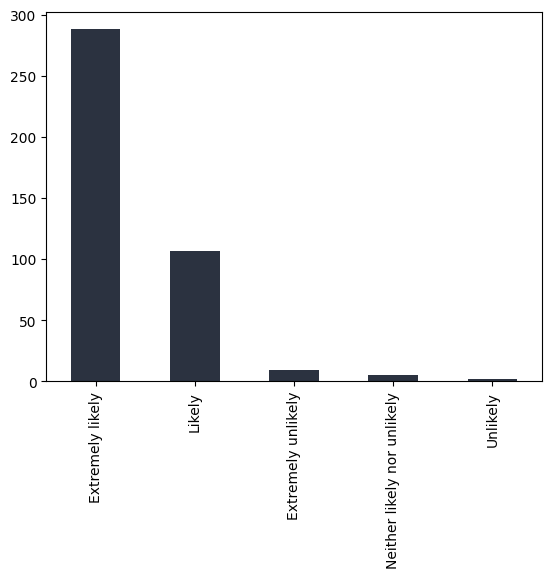

In [101]:
data['rating'].value_counts().plot(kind='bar', color='#2b3240')

In [102]:
# Mapping dictionary
rating_map = {
    'Extremely likely': 5,
    'Likely': 4,
    'Neither likely nor unlikely': 3,
    'Unlikely': 2,
    'Extremely unlikely': 1
}

# Apply the mapping to the 'rating' column
data['rating_score'] = data['rating'].map(rating_map)

In [103]:
data.set_index('time', inplace=True)
data.head()


,rating,free_text,do_better,full_text,label1,score1,label2,score2,label3,score3,rating_score
time,,,,,,,,,,,
2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up,"Very friendly caring staff, treated me with re...",admiration,0.795817,approval,0.221384,positive,0.956834,5
2023-07-13 15:29:16,Extremely likely,so good so confidential,,so good so confidential,admiration,0.910946,approval,0.073821,positive,0.925523,5
2023-07-13 15:29:21,Extremely likely,The doctor was very understanding and very kno...,No. It was the best.,The doctor was very understanding and very kno...,admiration,0.915100,approval,0.161223,positive,0.974944,5
2023-07-13 15:30:10,Extremely likely,Dr Emiliani was extremely nice,the receptionist was very unkind,Dr Emiliani was extremely nice the receptionis...,admiration,0.864688,neutral,0.078259,positive,0.910926,5
2023-07-13 15:31:48,Extremely likely,I was spoken to politely on the phone and a te...,No. I was happy with everything.,I was spoken to politely on the phone and a te...,joy,0.447508,relief,0.138327,positive,0.652162,5


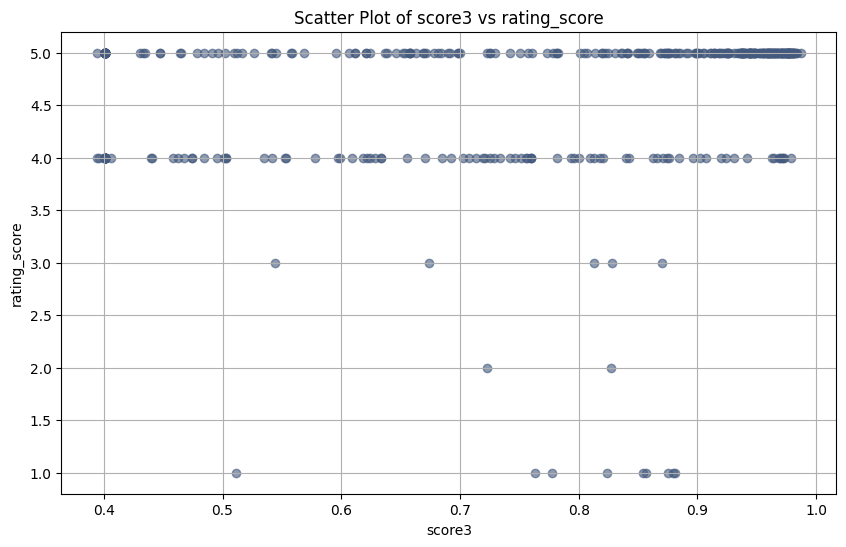

In [104]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Create a scatter plot for 'score3' and 'rating_score'
plt.figure(figsize=(10, 6))
plt.scatter(data['score3'], data['rating_score'], alpha=0.6, color='#43597d')
plt.title('Scatter Plot of score3 vs rating_score')
plt.xlabel('score3')
plt.ylabel('rating_score')
plt.grid(True)
plt.show()

In [105]:
# Calculate the Pearson correlation between 'score3' and 'rating_score'
correlation = data['score3'].corr(data['rating_score'])

correlation

0.1239471178475618

In [106]:
# Resample and count the entries per day
daily_count = data.resample('W').size()

# Reset index to convert Series to DataFrame
daily_count = daily_count.reset_index(name='entry_count')

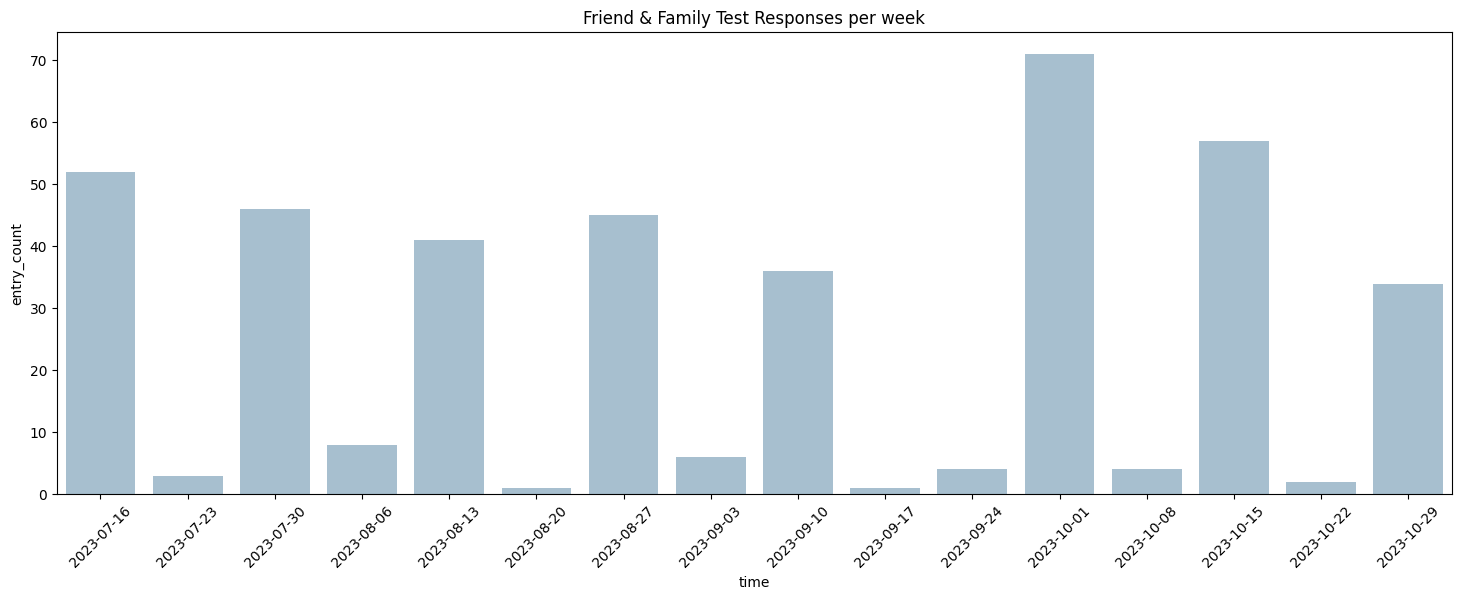

In [107]:
# Plotting
plt.figure(figsize=(18, 6))
sns.barplot(data=daily_count, x='time', y='entry_count', color='#a0c0d6')
# Customizing x-axis labels
n = len(daily_count['time'])
tick_frequency = n // 10  # Show only 10 date labels for illustration, adjust as needed
plt.xticks(ticks=range(0, n, tick_frequency), labels=[daily_count['time'].iloc[i].strftime('%Y-%m-%d') for i in range(0, n, tick_frequency)], rotation=45)
plt.title('Friend & Family Test Responses per week')
plt.show()

In [108]:
# Resample and count the entries per day
monthly_count = data.resample('M').size()

# Reset index to convert Series to DataFrame
monthly_count = monthly_count.reset_index(name='entry_count')

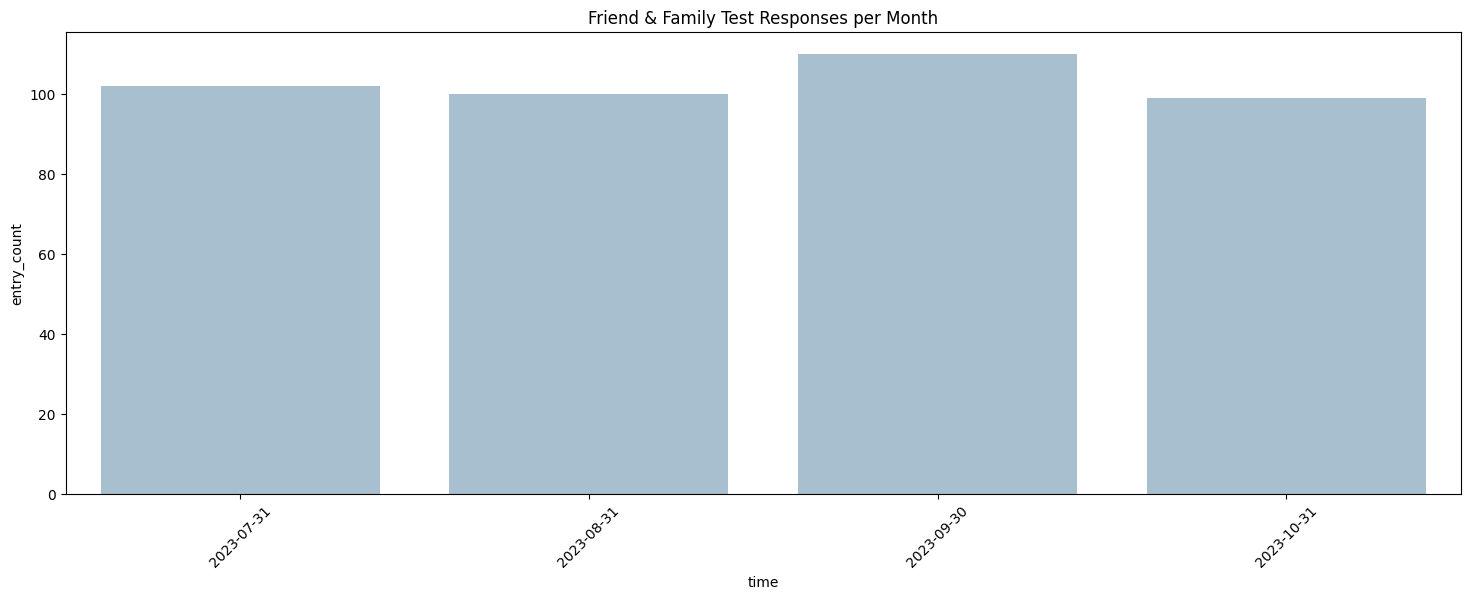

In [109]:
# Plotting
plt.figure(figsize=(18, 6))
sns.barplot(data=monthly_count, x='time', y='entry_count', color='#a0c0d6')
# Customizing x-axis labels
n = len(monthly_count['time'])
tick_frequency = n // 4  # Show only 10 date labels for illustration, adjust as needed
plt.xticks(ticks=range(0, n, tick_frequency), labels=[monthly_count['time'].iloc[i].strftime('%Y-%m-%d') for i in range(0, n, tick_frequency)], rotation=45)
plt.title('Friend & Family Test Responses per Month')
plt.show()

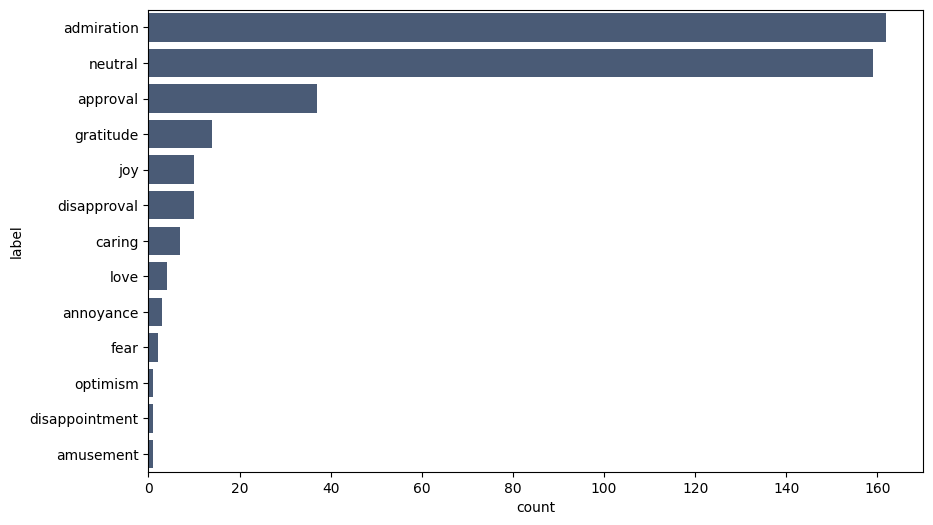

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
label_counts = data['label1'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

# Sort the dataframe by count
label_counts = label_counts.sort_values(by='count', ascending=False)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=label_counts, y='label', x='count', color="#43597d")
plt.show()

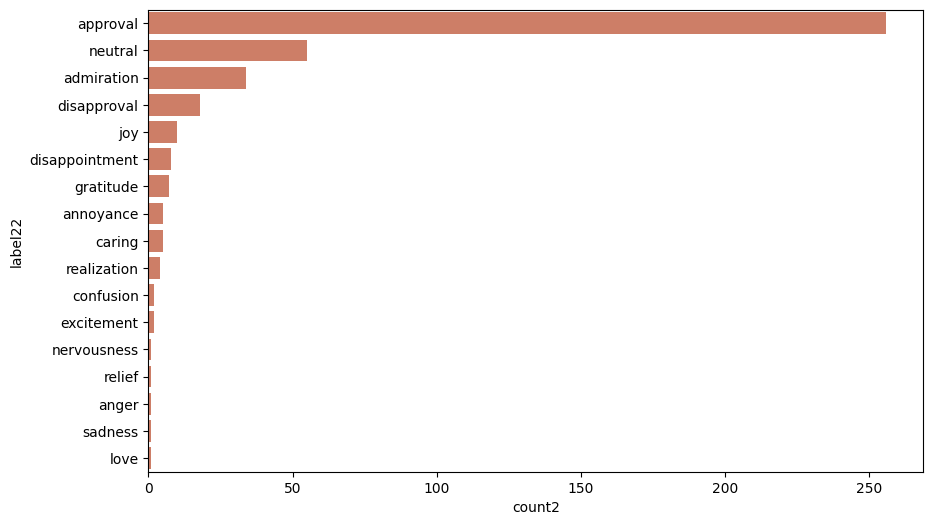

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
label_counts2 = data['label2'].value_counts().reset_index()
label_counts2.columns = ['label22', 'count2']

# Sort the dataframe by count
label_counts2 = label_counts2.sort_values(by='count2', ascending=False)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=label_counts2, y='label22', x='count2', color="#de7456")
plt.show()

In [112]:
unique_combinations = data[['label1', 'label2']].drop_duplicates()

# Show all unique combinations
unique_combinations.reset_index()
unique_combinations.sort_values(by=['label1', 'label2'])

,label1,label2
time,,
2023-07-13 15:28:22,admiration,approval
2023-07-26 17:14:26,admiration,caring
2023-08-04 21:20:30,admiration,confusion
2023-09-07 19:10:58,admiration,disappointment
2023-07-26 18:25:24,admiration,disapproval
2023-07-26 16:27:47,admiration,gratitude
2023-07-15 14:59:54,admiration,joy
2023-09-09 18:05:34,admiration,love
2023-07-13 15:30:10,admiration,neutral


In [113]:
monthly_avg = data['rating_score'].resample('M').mean()
monthly_avg_df = monthly_avg.reset_index()
monthly_avg_df.columns = ['Month', 'Average Rating']
monthly_avg_df

,Month,Average Rating
0,2023-07-31,4.715686
1,2023-08-31,4.510000
2,2023-09-30,4.654545
3,2023-10-31,4.565657


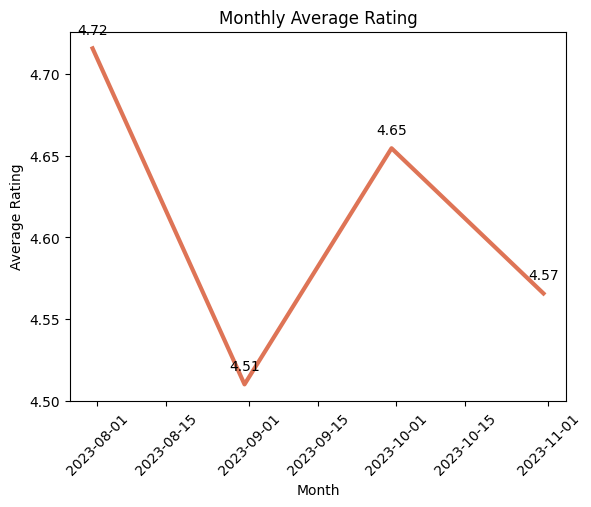

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot monthly averages
ax = sns.lineplot(x='Month', y='Average Rating', data=monthly_avg_df, color='#de7456', linewidth=3)
plt.title('Monthly Average Rating')
plt.xticks(rotation=45)

# Annotate each point with its value
for index, row in monthly_avg_df.iterrows():
    ax.annotate(f"{row['Average Rating']:.2f}", 
                (row['Month'], row['Average Rating']),
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') # horizontal alignment can be left, right or center

# Show the plots
plt.show()

In [115]:
# Filter rows where 'label1' is 'fear', 'annoyance', or 'disapproval'
filtered_rows = data[data['label1'].isin(['fear', 'annoyance', 'disapproval', 'amusement'])]

# Print the 'full_text' column of the filtered rows
for text in filtered_rows['full_text']:
    print(text)

Friendly and good Can’t think of anything
I did not have an appointment with the surgery! I had one with Earls court fitness centre? Yes they didn't have my xray for my arm a waste off time for me there!
Not caring practice I am afraid More knowledge newly qualified doctors , enthusiastic
Doctor's response No
It went ok Don’t think so
Receptionist are rude and unhelpful I understand their job is stressful,but there is not need to be so rude and intimidating.
Everybody at rhe surgery is friendly, dedicated & supportive I don't think so
The service is very good and staff are very friendly. I came to the surgery with my Son an old lady assaulted him. Call him names and nearly hit him with her working stick I don’t feel safe after being with the same surgery for more than 20 years. My son is still terrified about what happen to him.
They are entertaining in proper Yes. a bit better.
Excellent test speed and gp advice No
Efficient and polite. No
I do not appreciate being asked by reception 

### Prompt for ChatGPT-4
Summarise this feedback received by a GP Pracitce in a numbered List.<BR>
https://chat.openai.com/auth/login

In [116]:
# Filter rows where 'label1' is 'fear', 'annoyance', or 'disapproval'
filtered_rows_sentiment = data[data['score3'] < 0.40]

# Print the 'full_text' column of the filtered rows
for text in filtered_rows_sentiment['full_text']:
    print(text.strip())

Staff is friendly and you get good care and nurse is available I don’t need to go to hospital for small injuries Doctors waiting is not long easily available Nothing I can think about
Professional, helpful, I don't think there is anything to improve
Generally great service but practice is probably to far for most of my friends and family love in another part of the UK


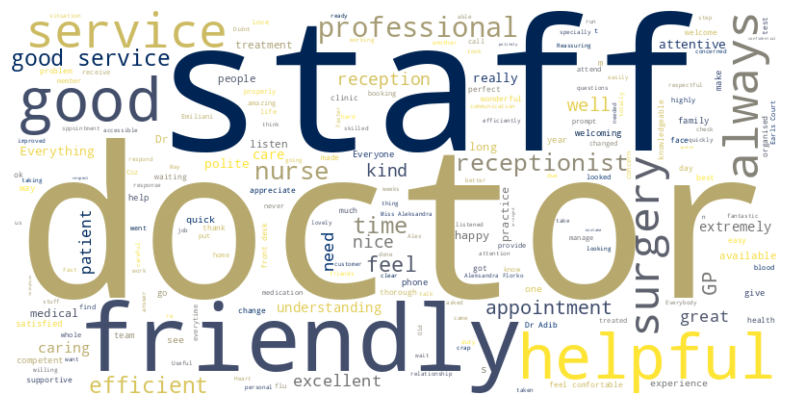

In [145]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the free_text into one large string
text = ' '.join(data['free_text'].dropna())

# Create a WordCloud object with a specific colormap
wordcloud = WordCloud(background_color='white', colormap='cividis', width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()